In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from collections import Counter

# Ground Truth Track

In [2]:
def load_graph(filename, load_compelete_graph=False):
    with np.load(filename) as f:
        complete_flags = f['complete_flags'] 
        if load_compelete_graph and len(complete_flags)!=0:
            track_vector = f['track_vector'][complete_flags]
            origin_vertices = f['origin_vertices'][complete_flags]
            momentums = f['momentums'][complete_flags].reshape(-1, 3)
            pids = f['pids'][complete_flags]
            ptypes = f ['ptypes'][complete_flags]
            energy = f['energy'][complete_flags]
            trigger_track_flag = f['trigger_track_flag'][complete_flags]
        else:
            track_vector = f['track_vector']
            origin_vertices = f['origin_vertices']
            momentums = f['momentums'].reshape(-1, 3)
            pids = f['pids']
            ptypes = f ['ptypes']
            energy = f['energy']
            trigger_track_flag = f['trigger_track_flags']
        trigger = f['trigger']
        ip = f['ip']
        valid_trigger_flag = f['valid_trigger_flag']
        n_track = track_vector.shape[0]
    # need:
    # origin_vertices
    # adj
    return track_vector, complete_flags, origin_vertices, momentums, pids, ptypes, energy, trigger, ip, trigger_track_flag, valid_trigger_flag

In [35]:
n_files1 = 10000
n_files2 = 1000
data_dir1 = '/ssd2/tingting/HFMLNewFiles-old-parsed/trigger/1'
data_dir2 = '/ssd2/tingting/HFMLNewFiles-old-parsed/nontrigger/0'
filenames1 = sorted([os.path.join(data_dir1, f) for f in os.listdir(data_dir1)
                                if f.startswith('event') and not f.endswith('_ID.npz')])[700000:700000+n_files1]
filenames2 = sorted([os.path.join(data_dir2, f) for f in os.listdir(data_dir2)
                                if f.startswith('event') and not f.endswith('_ID.npz')])[700000:700000+n_files2]

In [36]:

filenames = filenames1
n_trigger_tracks = []
dthetas = []
for file_index in range(len(filenames)):
    track_vector, complete_flags, origin_vertices, momentums, pids, ptypes, energy, trigger, ip, trigger_track_flag, valid_trigger_flag = load_graph(filenames[file_index])
    n_trigger_track = sum(trigger_track_flag)
    n_trigger_tracks.append(n_trigger_track)
    
    if n_trigger_track == 2:
        # print(track_vector[trigger_track_flag, :3])
        theta = np.arctan(track_vector[trigger_track_flag, 1]/ track_vector[trigger_track_flag, 0])
        dtheta = theta[1] - theta[0]
        dthetas.append(abs(dtheta))
    

/tmp/ipykernel_33017/1963065440.py:11: RuntimeWarning: invalid value encountered in true_divide
  theta = np.arctan(track_vector[trigger_track_flag, 1]/ track_vector[trigger_track_flag, 0])


In [37]:
Counter(n_trigger_tracks)

Counter({1: 91, 2: 9890, 4: 18, 3: 1})

In [6]:
ggplot_styles = {
    'axes.edgecolor': 'white',
    'axes.facecolor': 'EBEBEB',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': 'white',
    'grid.linewidth': '1.2',
    'xtick.color': '555555',
    'xtick.major.bottom': True,
    'xtick.minor.bottom': False,
    'ytick.color': '555555',
    'ytick.major.left': True,
    'ytick.minor.left': False,
}
plt.rcParams.update(ggplot_styles)

nan


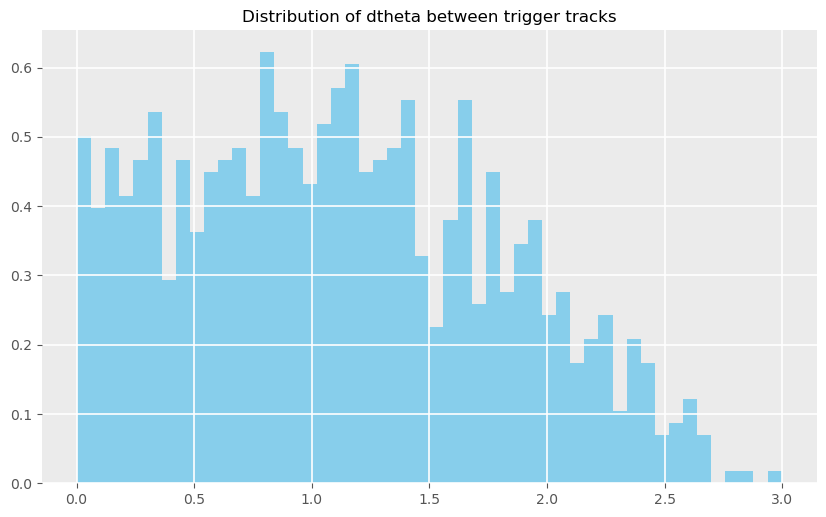

In [7]:
figure(figsize=(10, 6), dpi=100)
_, bins, _ = plt.hist(dthetas, bins=50, color='skyblue', label='Trigger', density=True)
plt.title('Distribution of dtheta between trigger tracks')
print(np.mean(dthetas))

In [8]:
from analysis_utils import get_circle, get_distance

In [46]:
def load_gt_track_graph(filename, load_compelete_graph=False):
    with np.load(filename) as f:
        complete_flags = f['complete_flags'] 
        if load_compelete_graph and len(complete_flags)!=0:
            track_vector = f['track_vector'][complete_flags]
            origin_vertices = f['origin_vertices'][complete_flags]
            momentums = f['momentums'][complete_flags]
            pids = f['pids'][complete_flags]
            ptypes = f ['ptypes'][complete_flags]
            energy = f['energy'][complete_flags]
            trigger_track_flag = f['trigger_track_flag'][complete_flags]
        else:
            track_vector = f['track_vector']
            origin_vertices = f['origin_vertices']
            momentums = f['momentums']
            pids = f['pids']
            ptypes = f ['ptypes']
            energy = f['energy']
            trigger_track_flag = f['trigger_track_flags']
        trigger = f['trigger']
        ip = f['ip']
        valid_trigger_flag = f['valid_trigger_flag']
        n_track = track_vector.shape[0]
    # need:
    # origin_vertices
    # adj
    return track_vector, complete_flags, origin_vertices, momentums, pids, ptypes, energy, trigger, ip, trigger_track_flag, valid_trigger_flag


def load_pred_track_graph(filename, load_compelete_graph=False):
    with np.load(filename, allow_pickle=True) as f:
        print(list(f.keys()))
        complete_flags = f['is_complete'] 
        if load_compelete_graph and len(complete_flags)!=0:
            track_vector = f['tracks_info'][complete_flags]
            origin_vertices = f['track_2nd_vertex'][complete_flags]
            momentums = f['momentum'][complete_flags].reshape(-1, 3)
            pids = f['pid'] #[complete_flags]
            radius = f['r'][complete_flags]
            is_trigger_track = f['is_trigger_track'][complete_flags]
            ptypes = f ['ParticleTypeID'][complete_flags]
            # energy = f['energy'][complete_flags]
            energy = 0
        else:
            track_vector = f['tracks_info']
            origin_vertices = f['track_2nd_vertex']
            momentums = f['momentum'].reshape(-1, 3)
            pids = f['pid']
            radius = f['r']
            is_trigger_track = f['is_trigger_track']
            ptypes = f['ParticleTypeID']
            # energy = f['energy']
            energy = 0
        trigger = f['trigger_flag']
        ip = f['ip']
        n_tracks = f['n_tracks']
        valid_trigger_flag = f['valid_trigger_flag']
    # need:
    # origin_vertices
    # adj
    # n_hits is number of hits for each track, it's a vector
    return track_vector, complete_flags, origin_vertices, momentums, pids, ptypes, energy, trigger, ip, is_trigger_track, valid_trigger_flag


In [43]:
gt_trk_input_dir = '/ssd2/tingting/HFMLNewFiles-old-parsed/trigger/1'
pred_trk_input_dir = '/ssd2/tingting/alltrack_predicted_trk/trigger/1'
n_files = 1000
filenames = sorted([f for f in os.listdir(pred_trk_input_dir) if f.startswith('event')])[:n_files]

In [48]:
file_index = 4

(26, 15) (26,)
['n_tracks', 'tracks_info', 'original_track_label', 'pid', 'momentum', 'is_trigger_track', 'ParticleTypeID', 'trigger_flag', 'track_2nd_vertex', 'modified_2nd_vertex', 'ip', 'valid_trigger_flag', 'is_complete', 'r', 'n_hits']


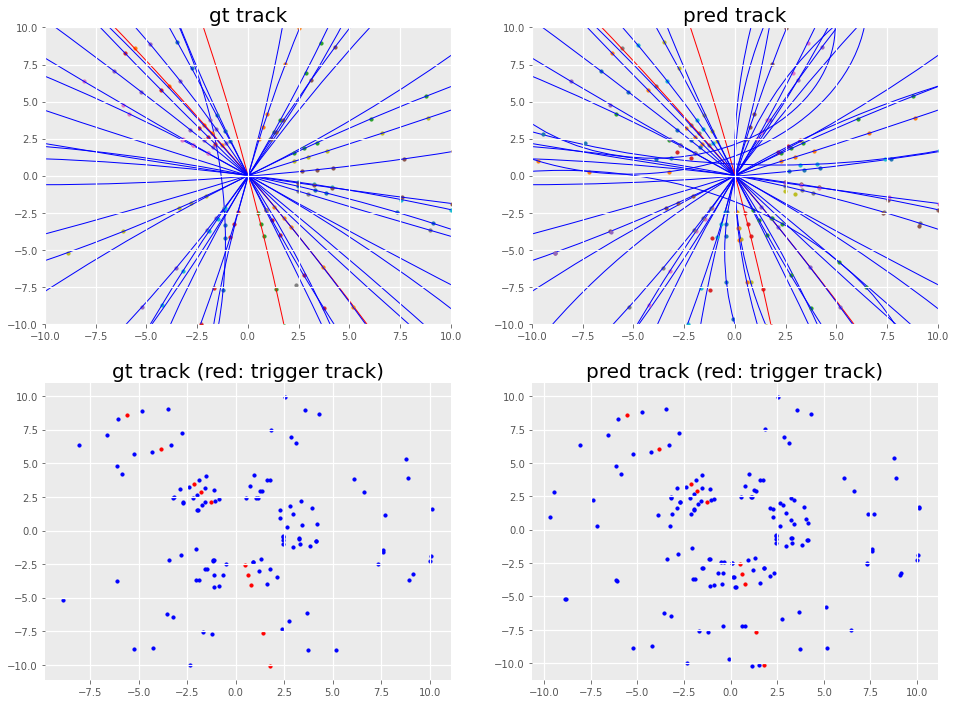

In [49]:
add_circle = True
fig, axs = plt.subplots(2, 2, figsize=(16,12))
filename = os.path.join(gt_trk_input_dir, filenames[file_index])
track_vector, complete_flags, origin_vertices, momentums, pids, ptypes, energy, trigger, ip, trigger_track_flag, valid_trigger_flag = load_gt_track_graph(filename)
gt_circle = get_circle(track_vector)
print(track_vector.shape, gt_circle[0].shape)
for i in range(track_vector.shape[0]):
    track = track_vector[i]
    hits = track[:15].reshape(5, 3)
    good_hits = np.all(hits != 0, axis=-1)
    AXISI, AXISII = 0, 1
    x, y = hits[good_hits, AXISI], hits[good_hits, AXISII]
    axs[0, 0].scatter(x, y, s=10)
    axs[0, 0].set_title('gt track', fontsize=20)
    
    # psv = origin_vertices[i]
    # d = get_distance(psv, ip)
    # if 0.00001 < d < 1:
    #     c = 'r'
    # else:
    #     c = 'b'
    if trigger_track_flag[i]:
        c = 'r'
    else:
        c = 'b'
    axs[1, 0].scatter(x, y, s=10, c=c)
    axs[1, 0].set_title('gt track (red: trigger track)', fontsize=20)

    if add_circle:
        radius, center = gt_circle.radius[i], gt_circle.center[i]
        if radius != 0:
            circle = plt.Circle(center, radius*100, fill=False, color=c)
            axs[0, 0].add_patch(circle)
            axs[0, 0].set_xlim([-10, 10])
            axs[0, 0].set_ylim([-10, 10])
    

filename = os.path.join(pred_trk_input_dir, filenames[file_index])
track_vector, complete_flags, origin_vertices, momentums, pids, ptypes, energy, trigger, ip, is_trigger_track, valid_trigger_flag = load_pred_track_graph(filename)
pred_circle = get_circle(track_vector[:, :15])
for i in range(track_vector.shape[0]):
    track = track_vector[i]
    hits = track[:15].reshape(5, 3)
    good_hits = np.all(hits != 0, axis=-1)
    AXISI, AXISII = 0, 1
    x, y = hits[good_hits, AXISI], hits[good_hits, AXISII]
    axs[0, 1].scatter(x, y, s=10)
    axs[0, 1].set_title('pred track', fontsize=20)
    # psv = origin_vertices[i]
    # d = get_distance(psv, ip)
    # if 0.00001 < d < 1:
    #     c = 'r'
    # else:
    #     c = 'b'
    if is_trigger_track[i]:
        c = 'r'
    else:
        c = 'b'
    axs[1, 1].scatter(x, y, s=10, c=c)
    axs[1, 1].set_title('pred track (red: trigger track)', fontsize=20)

    if add_circle:
        radius, center = pred_circle.radius[i], pred_circle.center[i]
        if radius != 0:
            circle = plt.Circle(center, radius*100, fill=False, color=c)
            axs[0, 1].add_patch(circle)
            axs[0, 1].set_xlim([-10, 10])
            axs[0, 1].set_ylim([-10, 10])